# Moving Visual of Disturbances

This notebook takes the output of other notebooks in this folder and visualisizes each 5 year period so that it can be turned into an animated GIF to better visualize the disturbances.

In [1]:
# Import packages and define paths
import earthpy as et
from os import path
import earthpy.plot as ep
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from glob import glob
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import gc

home = path.join(et.io.HOME, "GitHub", "visualize-forest-disturbance")

home_tif = path.join(et.io.HOME, "GitHub", "visualize-forest-disturbance", "output_tifs")

forest_folder = path.join(home, "forest-disturbance-stack", "western-conus")

fiveyear_all_folder = path.join(home, "forest-disturbance-stack", "five-year-all")

In [2]:
# Create ecoregions visualization
epa_ecoregions = gpd.read_file(path.join(home, "EPA-ecoregions", "us_eco_l3", "us_eco_l3.shp"))

western_forests_regions = ([str(i) for i in list(range(27))] + 
[str(i) for i in list(range(41, 45))] +
[str(i) for i in list(range(77, 82))] 
)

western_epa = epa_ecoregions[epa_ecoregions['US_L3CODE'].isin(western_forests_regions)]

In [3]:
# Create a unique colormap for this visualization
terrain = mpl.colormaps['RdYlGn_r'].resampled(4)
newcolors = terrain(np.linspace(0, 1, 4)) 
white = np.array([0, 0, 0, 0])
newcolors[:1, :] = white
groups = ["0", "1", "2", "3+"]
classes=[0, 2, 3, 4]
newcmp = ListedColormap(newcolors)

2012-2016
2013-2017
2014-2018
2015-2019
2016-2020


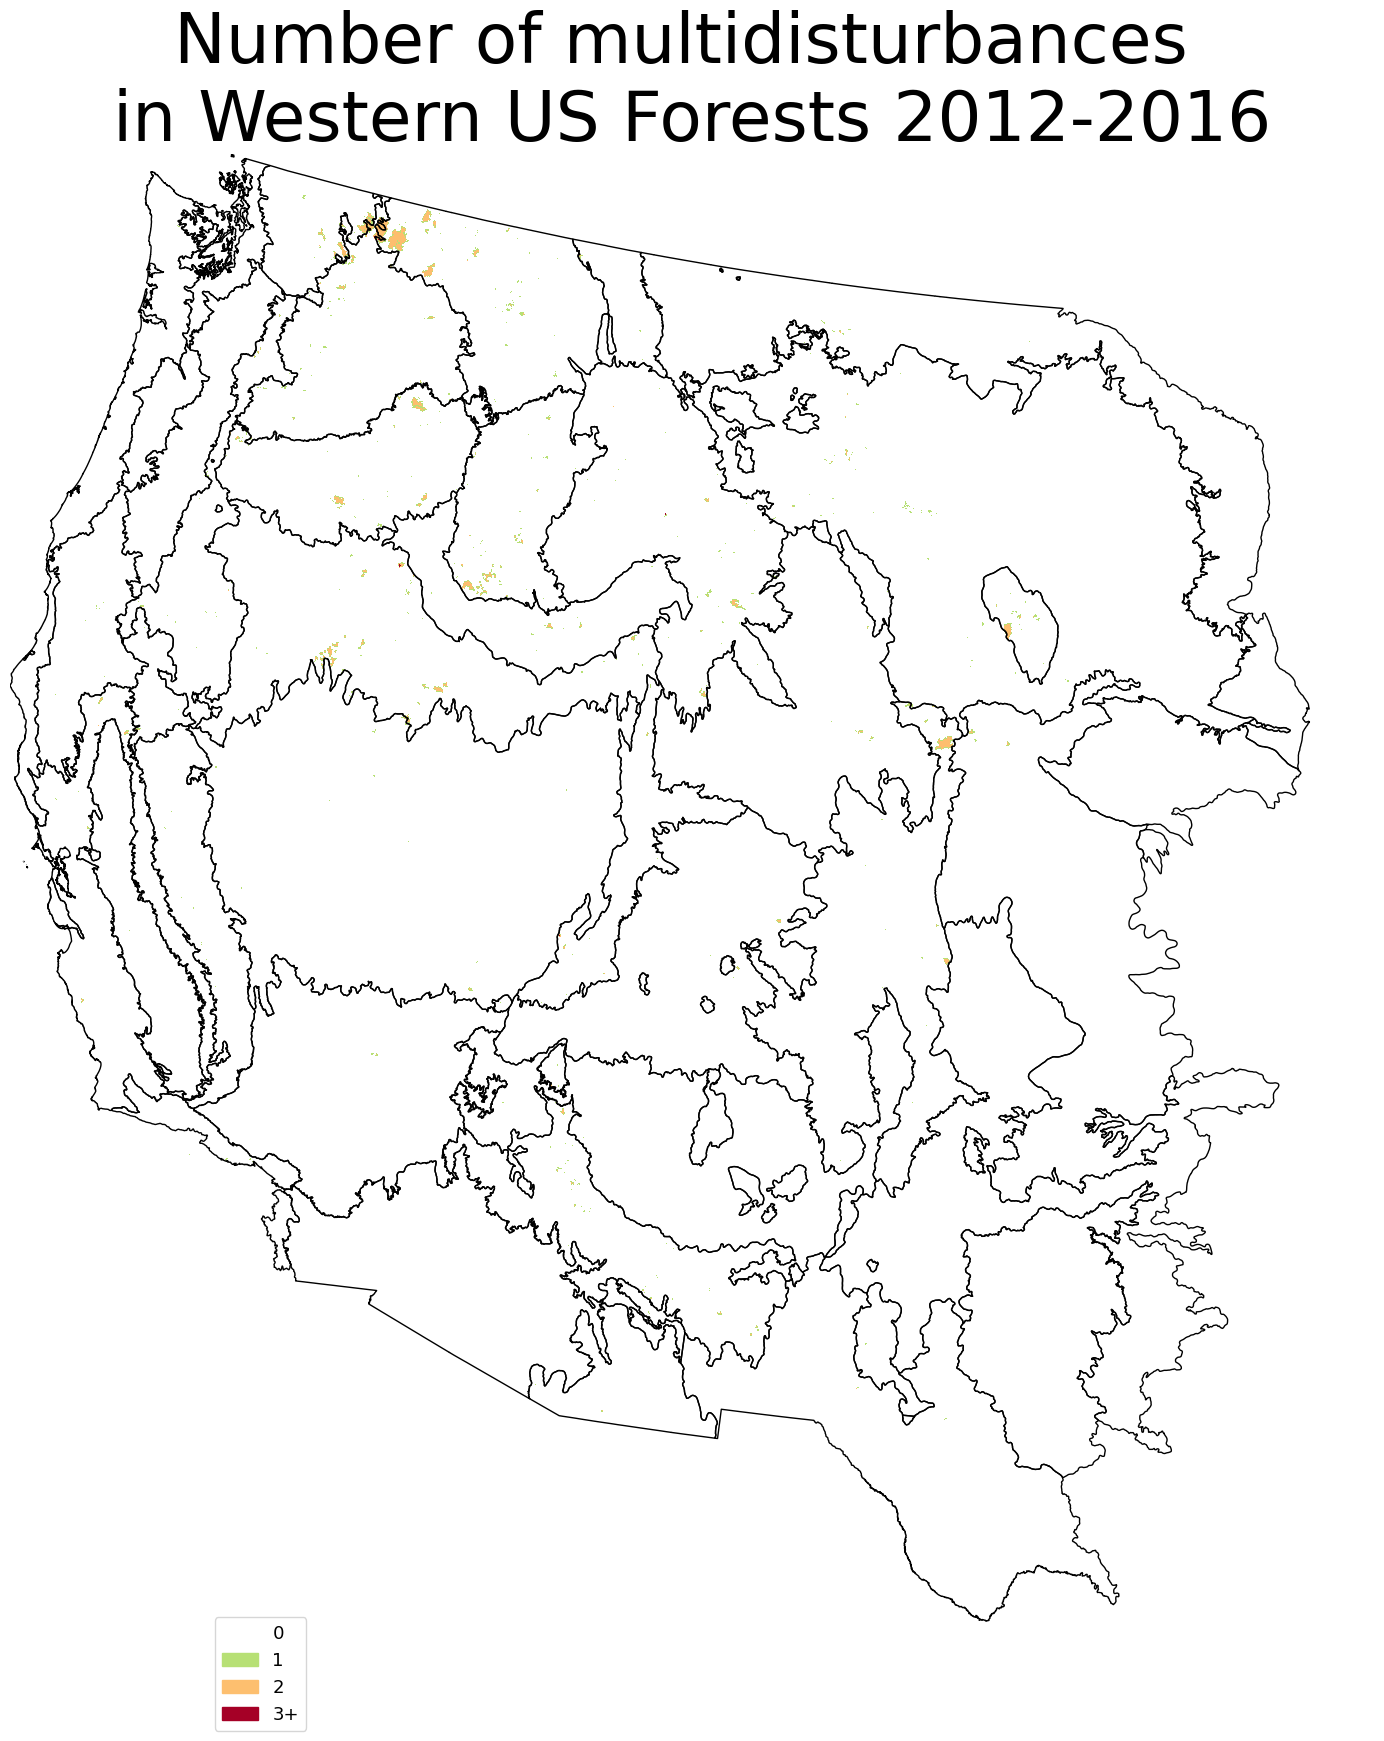

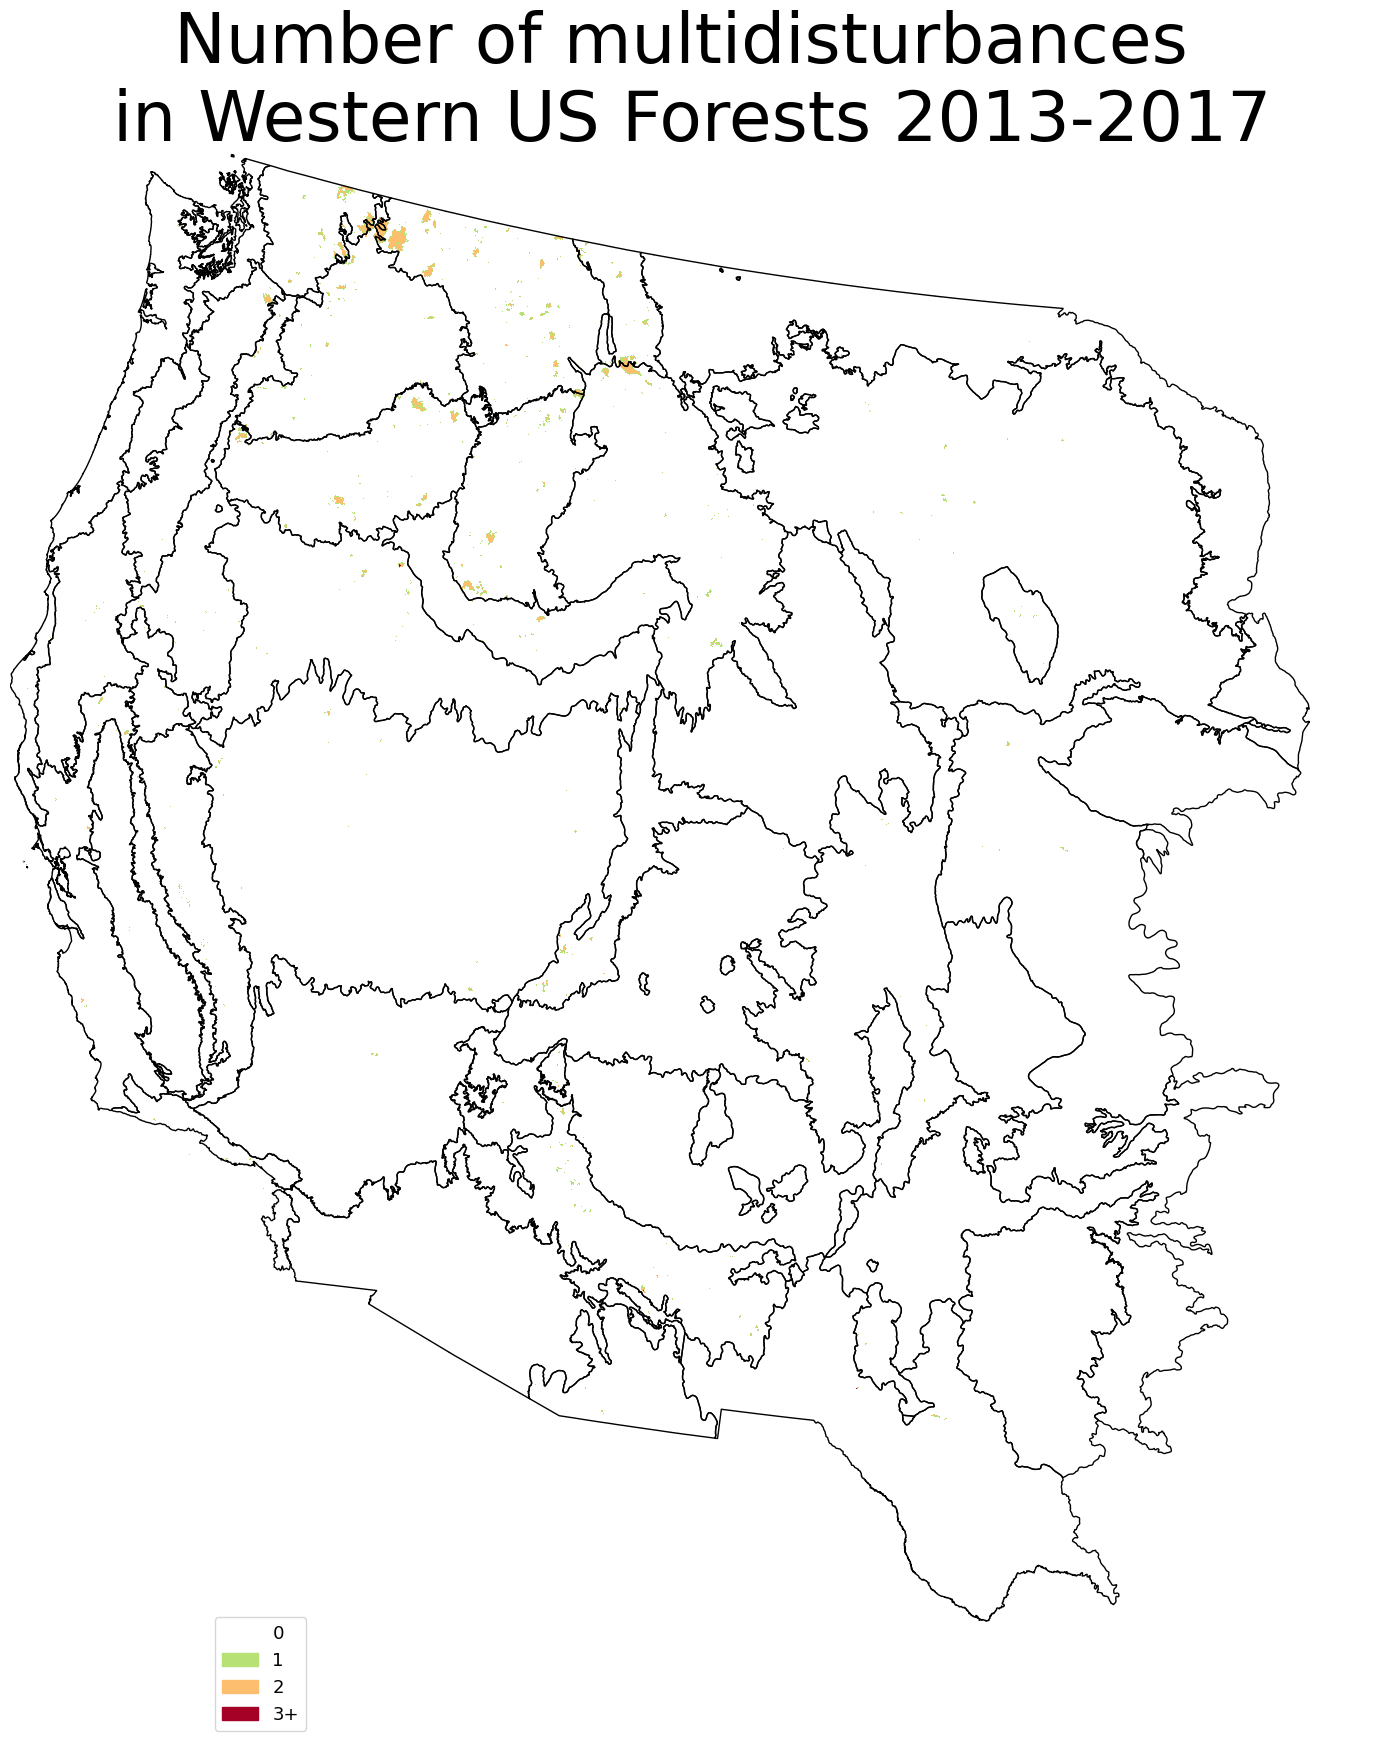

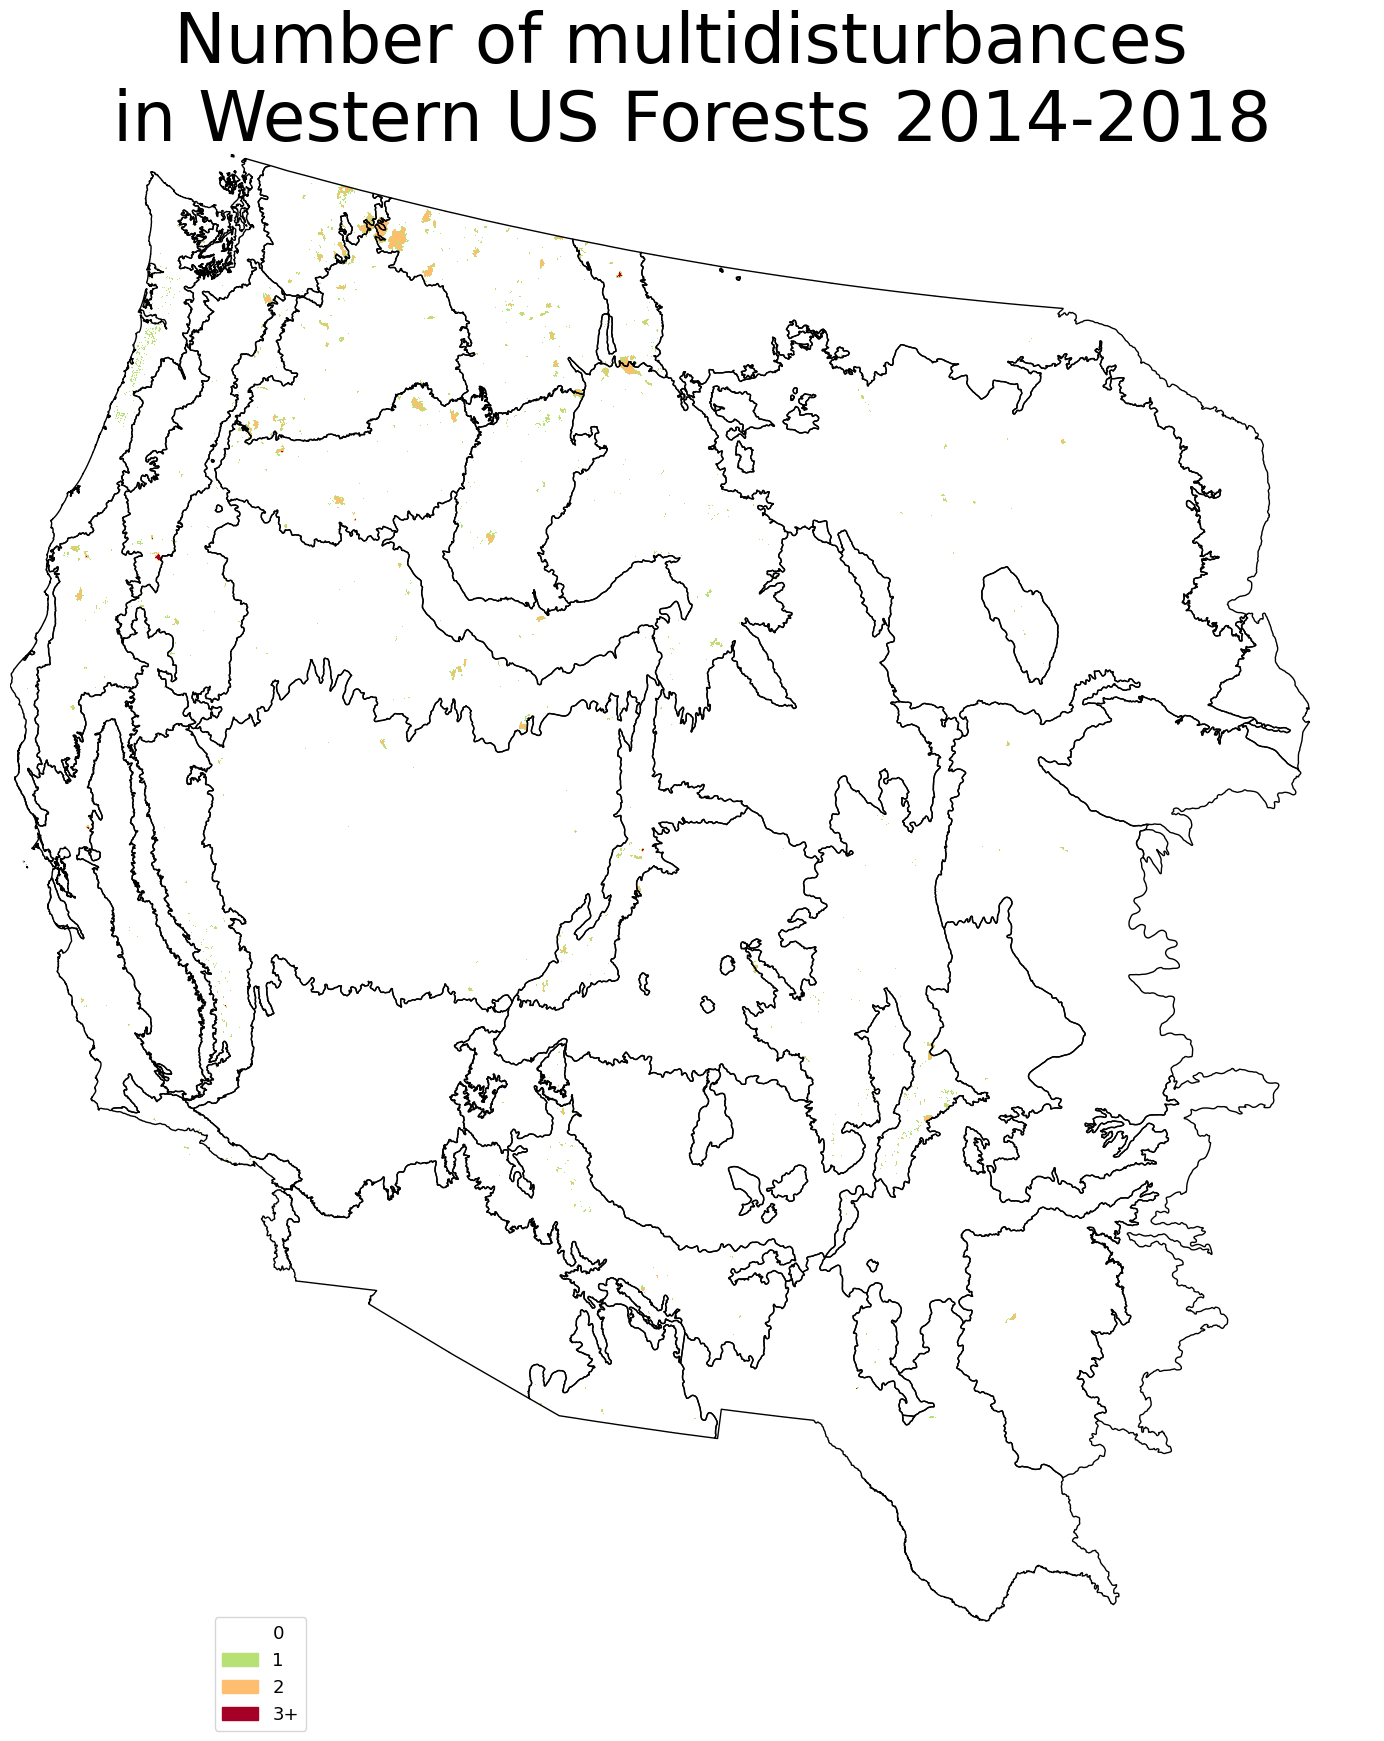

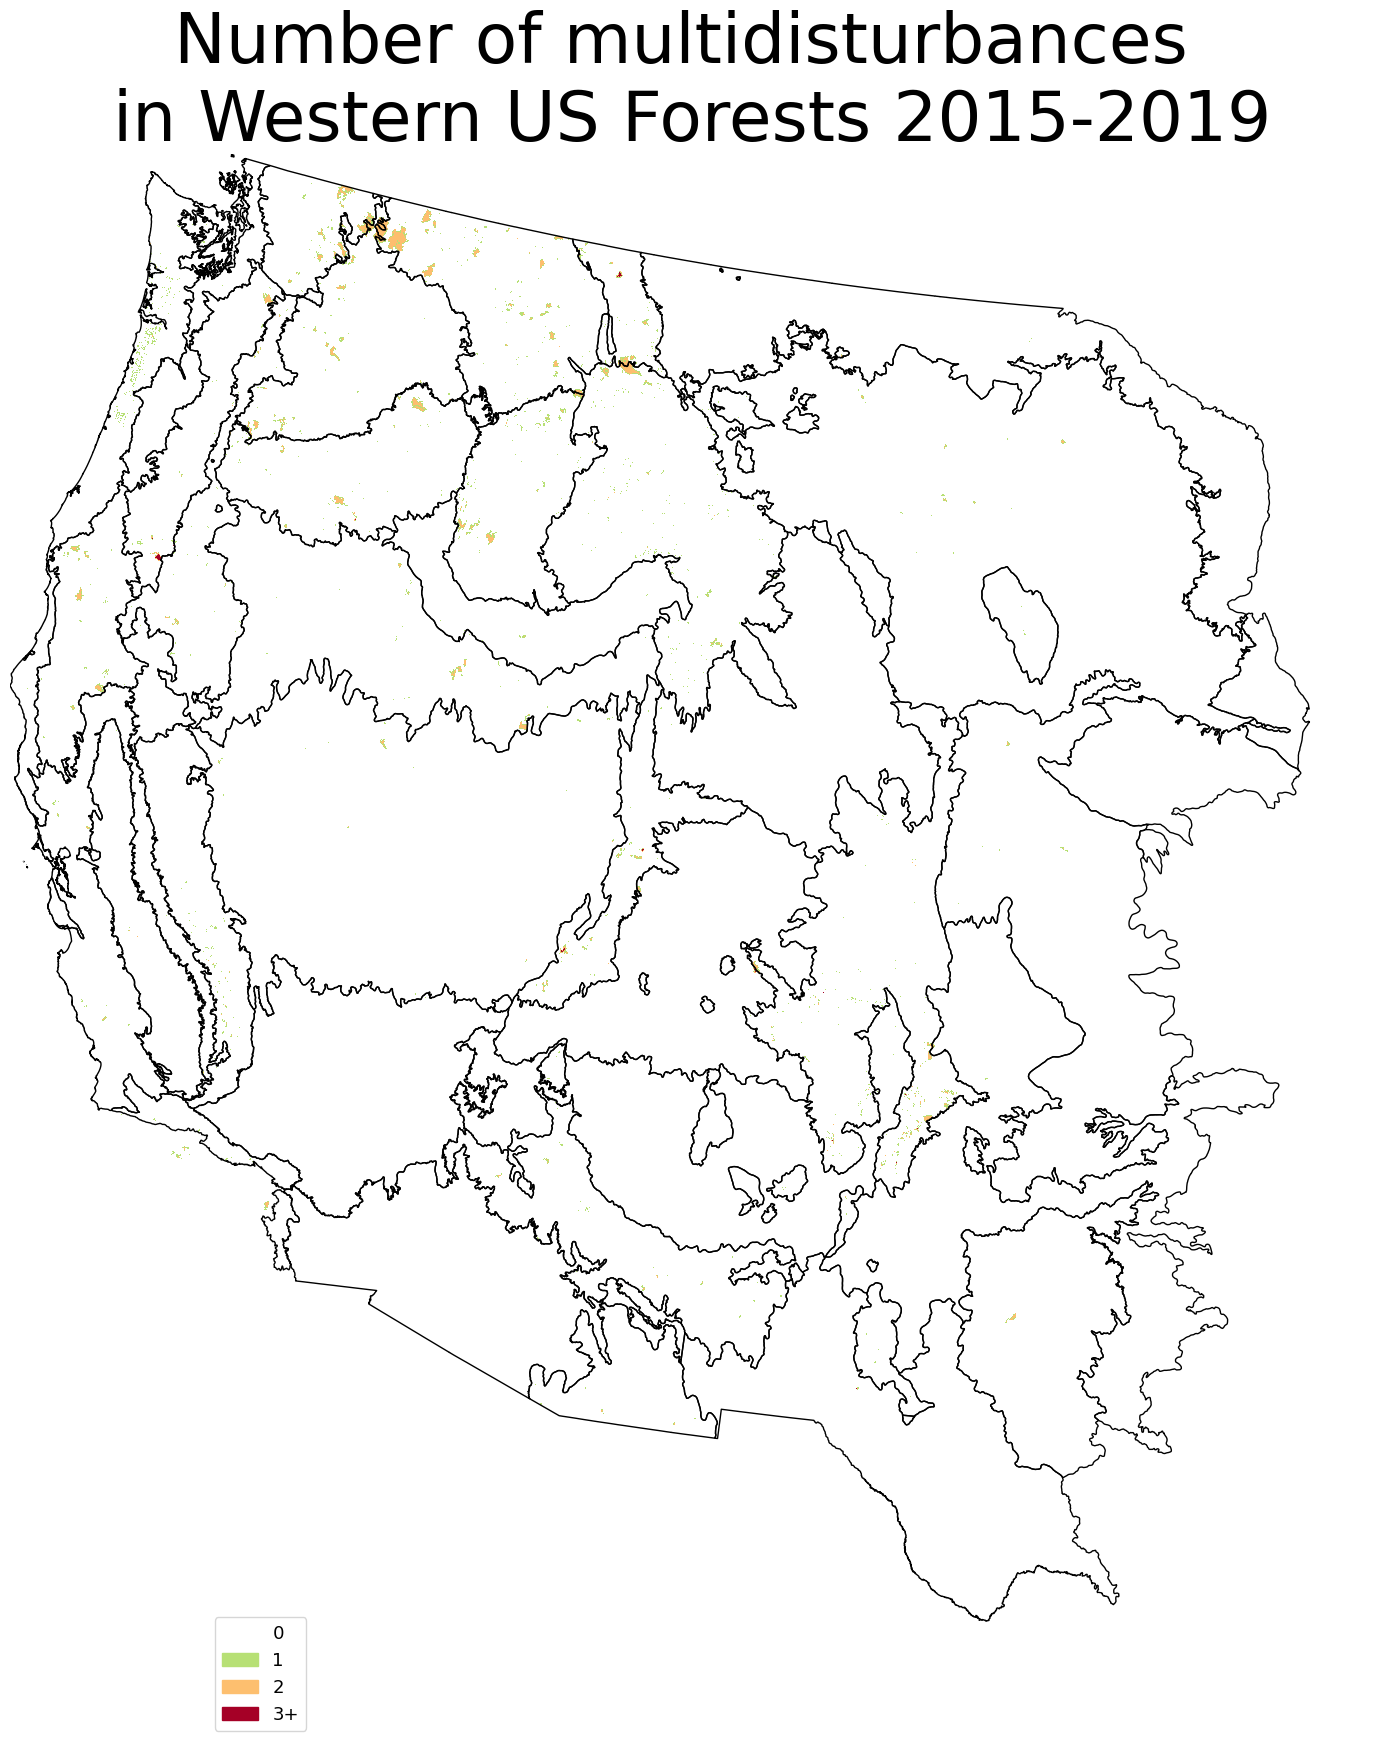

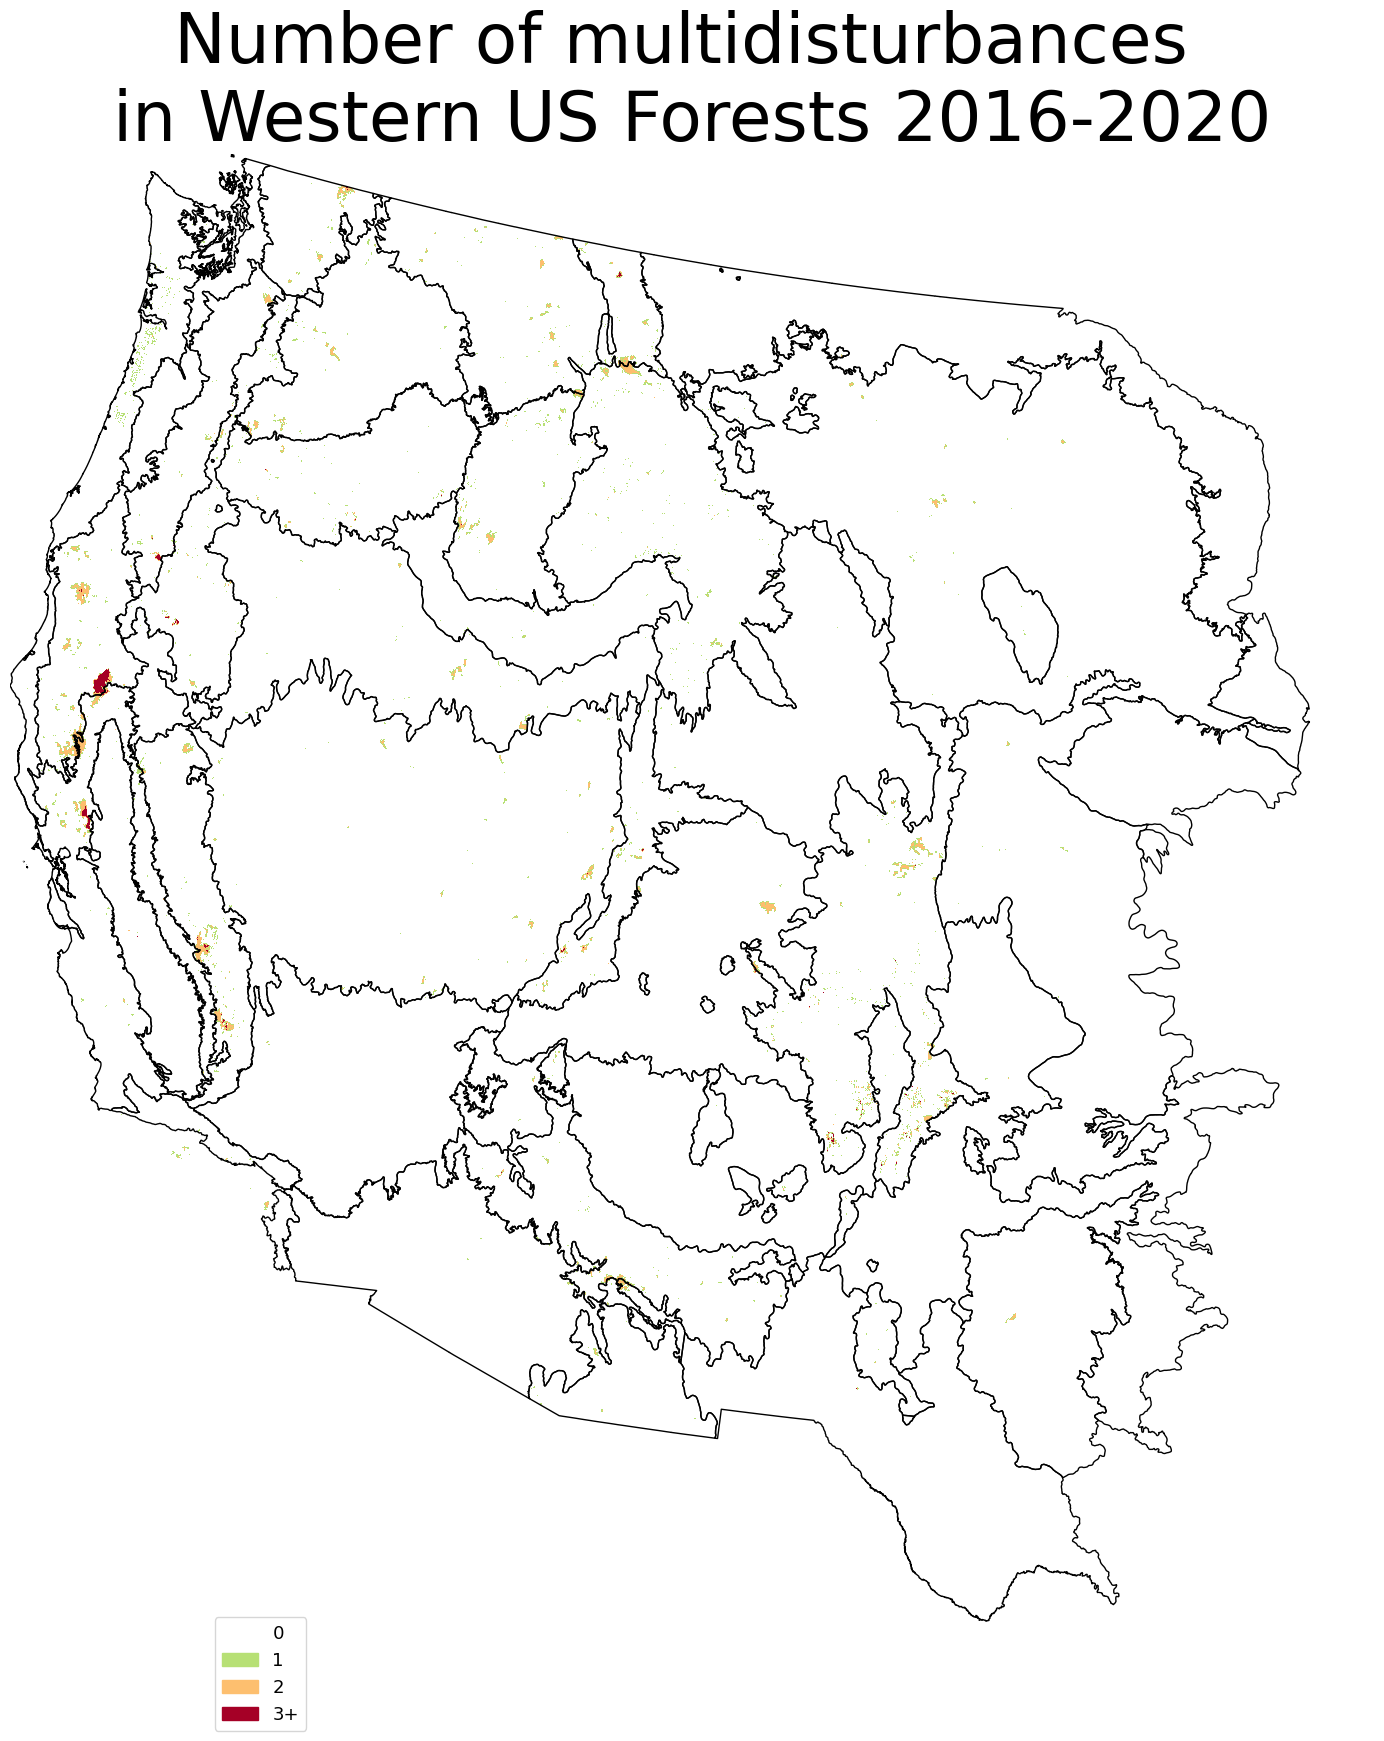

In [4]:
# Plot and store all disturbance total gifs
short_list = sorted(glob(path.join(fiveyear_all_folder, "disturbance_totals_*-2*.tif")))

for tif in short_list[13:]:
    years = tif[-13:-4]
    print(years)
    with rio.open(tif) as src:
        array = src.read(1)
        extent = plotting_extent(src)
        crs = src.crs
    western_epa_reproj = western_epa.to_crs(crs)
    array[array <= 1] = 0
    fig, ax = plt.subplots(figsize=(20, 20))

    ep.plot_bands(array,
                ax=ax,
                extent=extent, 
                cmap=newcmp, 
                vmax=4,
                cbar=False,
                scale=False)

    leg = ep.draw_legend(im_ax=ax.get_images()[0],
                classes=classes,
                titles=groups,
                bbox=[0.15, 0.05])


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_title(label="Number of multidisturbances \nin Western US Forests {}".format(years), size=50)

    western_epa_reproj.boundary.plot(ax=ax, color="black", linewidth=1)

    plt.savefig(path.join(home, "output_images", "multi_{}.png".format(years)), transparent=False)
    del(array)
    del(western_epa_reproj)
    gc.collect()
# plt.show()

In [22]:
# Take images and create a GIF that animates where the disturbances move to
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in sorted(glob(f"{frame_folder}/multi*.png"))]
    frame_one = frames[0]
    frame_one.save("multi_dist_slow_loop.gif", format="GIF", append_images=frames,
            save_all=True, duration=2000, loop=100
)

make_gif(path.join(home, "output_images"))